# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="Tennis_Windows_x86_64/Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.0
Score (max over agents) from episode 2: 0.0
Score (max over agents) from episode 3: 0.09000000171363354
Score (max over agents) from episode 4: 0.0
Score (max over agents) from episode 5: 0.0


In [64]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torch
import torch.nn as nn
import torch.nn.functional as F

def hidden_init(layer):
    fan_in = layer.weight.data.size()[0]
    lim = 1. / np.sqrt(fan_in)
    return -lim, lim


class Actor(nn.Module):
    """Actor (Policy) Model."""

    def __init__(self, state_size, action_size, seed, dense1_size=512, dense2_size=256):
        """Initialize parameters and build model.
        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            seed (int): Random seed
        """
        super(Actor, self).__init__()
        self.seed = torch.manual_seed(seed)
        
        "*** YOUR CODE HERE ***"
        #self.batchNorm = nn.BatchNorm1d(state_size)
        
        # input layer same as state size to fully connected hidden layer with relu activation
        self.dense1 = nn.Linear(state_size, dense1_size)
        #torch.nn.init.xavier_uniform_(self.dense1.weight)
        
        # to another fully connected hidden layer with relu activation
        self.dense2 = nn.Linear(dense1_size, dense2_size)
        #torch.nn.init.xavier_uniform_(self.dense2.weight)
        
        # to final fully connected layer same as action size with tanh activation        
        self.dense3 = nn.Linear(dense2_size, action_size)
        #torch.nn.init.xavier_uniform_(self.dense3.weight)
        self.reset_parameters()

    def reset_parameters(self):
        self.dense1.weight.data.uniform_(*hidden_init(self.dense1))
        self.dense2.weight.data.uniform_(*hidden_init(self.dense2))
        self.dense3.weight.data.uniform_(-3e-3, 3e-3)

    def forward(self, state):
        """Build a network that maps state -> actions."""
        #if state.dim() == 1:
        #    state = state.unsqueeze(0)
        #state = self.batchNorm(state)

        x = F.relu(self.dense1(state))
        x = F.relu(self.dense2(x))
        x = F.tanh(self.dense3(x))    # action must be between -1 and 1
        
        return x


class Critic(nn.Module):
    """Critic (Action Value) Model."""

    def __init__(self, state_size, action_size, seed, dense1_size=512, dense2_size=256):
        """Initialize parameters and build model.
        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            seed (int): Random seed
        """
        super(Critic, self).__init__()
        self.seed = torch.manual_seed(seed)
        
        "*** YOUR CODE HERE ***"
        # input layer same as state size to fully connected hidden layer with relu activation
        #self.batchNorm = nn.BatchNorm1d(state_size)
        
        self.dense1 = nn.Linear(state_size, dense1_size)
        #torch.nn.init.xavier_uniform_(self.dense1.weight)
        
        # to another fully connected hidden layer with relu activation
        self.dense2 = nn.Linear(dense1_size + action_size, dense2_size)   # include actions in this layer
        #torch.nn.init.xavier_uniform_(self.dense2.weight)
        
        #self.dropout = nn.Dropout(0.2)
        
        # to final fully connected layer same as action size with linear activation        
        self.dense3 = nn.Linear(dense2_size, 1)    # all it returns is the action value
        #torch.nn.init.xavier_uniform_(self.dense3.weight)
        self.reset_parameters()

    def reset_parameters(self):
        self.dense1.weight.data.uniform_(*hidden_init(self.dense1))
        self.dense2.weight.data.uniform_(*hidden_init(self.dense2))
        self.dense3.weight.data.uniform_(-3e-3, 3e-3)

    def forward(self, state, action):   # pass the action so it can be concatenated in 2nd hidden layer
        """Build a network that maps state -> action values."""
        #if state.dim() == 1:
        #    state = state.unsqueeze(0)
        #state = self.batchNorm(state)

        x = F.relu(self.dense1(state))
        #print("x.shape: ", x.shape)
        #print("action.shape: ", action.shape)
        x = torch.cat((x, action), dim=1)   # concatenate the output of 1st hidden layer with action
        
        x = F.relu(self.dense2(x))
        
        #x = self.dropout(x)
        
        x = self.dense3(x)     # linear output. No need to restrict action value       
        return x

In [65]:
import numpy as np
import random
from collections import namedtuple, deque
import copy

import torch
import torch.nn.functional as F
import torch.optim as optim

from operator import itemgetter

BUFFER_SIZE = int(1e6)  # replay buffer size
BATCH_SIZE = 256         # minibatch size
GAMMA = 0.99            # discount factor
TAU = 1e-2              # for soft update of target parameters
LR_ACTOR = 1e-4               # learning rate actor
LR_CRITIC = 3e-4               # learning rate critic
UPDATE_EVERY = 4        # how often to update the network (after every ? time steps)
UPDATE_TIMES = 1        # how many times do we update the network

WEIGHT_DECAY = 0.0        # L2 weight decay

#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")

class Agent():
    """Interacts with and learns from the environment."""

    def __init__(self, num_agents, state_size, action_size, seed):
        """Initialize an Agent object.
        
        Params
        ======
            num_agents (int): number of agents
            state_size (int): dimension of each state
            action_size (int): dimension of each action
            seed (int): random seed
        """
        self.num_agents = num_agents
        self.state_size = state_size
        self.action_size = action_size
        self.seed = random.seed(seed)

        # Actor-Network
        self.actorNetworks_local = [Actor(state_size, action_size, seed).to(device) for _ in range(num_agents)]
        self.actorNetworks_target = [Actor(state_size, action_size, seed).to(device) for _ in range(num_agents)]
        self.actorNetwork_optimizers = [optim.Adam(self.actorNetworks_local[i].parameters(), lr=LR_ACTOR) for i in range(num_agents)]

        # Critic-Network unmodified
        self.criticNetworks_local = [Critic(num_agents*state_size+(num_agents-1)*action_size, action_size, seed).to(device) for _ in range(num_agents)]
        self.criticNetworks_target = [Critic(num_agents*state_size+(num_agents-1)*action_size, action_size, seed).to(device) for _ in range(num_agents)]        
        self.criticNetwork_optimizers = [optim.Adam(self.criticNetworks_local[i].parameters(), lr=LR_CRITIC, 
                                                  weight_decay=WEIGHT_DECAY) for i in range(num_agents)]

        # Replay memory - one replay buffer per agent
        self.replay_buffers = [ReplayBuffer(BUFFER_SIZE) for _ in range(num_agents)]

        # Noise process
        #self.noise = OUNoise(action_size, seed)        
        self.noise = OUNoise((self.num_agents, action_size), seed)        
        
        # set target networks initial weights same as critic
        for i in range(self.num_agents):
            self.soft_update(self.criticNetworks_local[i], self.criticNetworks_target[i], 1)
            self.soft_update(self.actorNetworks_local[i], self.actorNetworks_target[i], 1)
    
    def step(self, states, actions, rewards, next_states, dones, timestep):
        # Save experience in replay memory
        for i, (state, action, reward, next_state, done) in enumerate(zip(states, actions, rewards, next_states, dones)):
            self.replay_buffers[i].add(state, action, reward, next_state, done)            
        
        # Learn every UPDATE_EVERY time steps.
        replay_buffer_len = len(self.replay_buffers[0])
        if replay_buffer_len > BATCH_SIZE and timestep % UPDATE_EVERY == 0:
            # If enough samples are available in memory, get random subset and learn
            for _ in range(UPDATE_TIMES):
                agent_experiences = []
                sample_indices = np.random.randint(replay_buffer_len, size=BATCH_SIZE)
                for i in range(self.num_agents):
                    agent_experiences.append(self.replay_buffers[i].sample(sample_indices))
            
                self.learn(agent_experiences, GAMMA)

    def act(self, states, epsilon=1):
        """Returns actions for given state as per current policy.
        
        Params
        ======
            states (array_like): current state (num of agents x state size)
            there is no epsilon needed here because actions are continuous, not discrete
            add_noise (bool): flag to add noise to predicted actions during training
        """
        actions_allagents = np.zeros((self.num_agents, self.action_size))
        states_allagents = torch.from_numpy(states).float().to(device)
        
        noise = epsilon*self.noise.sample()
        for i in range(self.num_agents):
            self.actorNetworks_local[i].eval()    # switch to eval mode

            #for i, state in enumerate(states):   # one state vector per agent
            states = states_allagents[i]
            with torch.no_grad():
                actions_allagents[i] = self.actorNetworks_local[i](states).cpu().data.numpy()
                #print("actions_allagents[i].shape", actions_allagents[i].shape)
                actions_allagents[i] += noise[i]
                actions_allagents[i] = np.clip(actions_allagents[i], -1, 1)

            self.actorNetworks_local[i].train()    # switch back to training mode
        
        return actions_allagents

    def reset_noise(self):
        self.noise.reset()
        
    def learn(self, agent_experiences, gamma):
        """Update policy and value parameters using given batch of experience tuples.
        Q_targets = r + γ * critic_target(next_state, actor_target(next_state))
        where:
            actor_target(state) -> action
            critic_target(state, action) -> Q-value
        Params
        ======
            experiences (Tuple[torch.Tensor]): tuple of (s, a, r, s', done) tuples 
            gamma (float): discount factor
        """

        states_aa = []
        actions_aa = []
        next_states_aa = []
        for i in range(self.num_agents):
            states, actions, _, next_states, _ = agent_experiences[i]
            states_aa.append(states)
            actions_aa.append(actions)
            next_states_aa.append(next_states)
        
        #print("initial critic_states.shape: ", critic_states.shape)
        #print("initial critic_actions.shape: ", critic_actions.shape)
        
        for i in range(self.num_agents):
            #print("torch cat executed")
            states, actions, rewards, next_states, dones = agent_experiences[i]
            
            next_actions = self.actorNetworks_target[i](next_states) 
            pred_actions = self.actorNetworks_local[i](states) 

            critic_states = states
            critic_next_states = next_states
            for j in range(self.num_agents):
                if j == i:
                    continue
                  
                critic_states = torch.cat((critic_states, states_aa[j]), dim=1)
                critic_states = torch.cat((critic_states, actions_aa[j]), dim=1)

                critic_next_states = torch.cat((critic_next_states, next_states_aa[j]), dim=1)
                
                next_actions_oa = self.actorNetworks_target[j](next_states) 
                critic_next_states = torch.cat((critic_next_states, next_actions_oa), dim=1)


            #print("final critic_states.shape: ", critic_states.shape)
            #print("final critic_actions.shape: ", critic_actions.shape)

            #print("actions: ", actions.data.size())

            # Update the critic network
            Qs = self.criticNetworks_local[i](critic_states, actions)

            Qns = self.criticNetworks_target[i](critic_next_states, next_actions)

            TD_Target = rewards + gamma*Qns*(1-dones)   # multiply by (1-dones): Qmax_ns = 0 for terminal state

            critic_loss = F.mse_loss(Qs, TD_Target)

            self.criticNetwork_optimizers[i].zero_grad()
            critic_loss.backward()
            #torch.nn.utils.clip_grad_norm_(self.criticNetwork_local.parameters(), 1)
            self.criticNetwork_optimizers[i].step()

            # Update the actor networks
            actor_loss = -self.criticNetworks_local[i](critic_states, pred_actions).mean()
                   
            self.actorNetwork_optimizers[i].zero_grad()
            actor_loss.backward()
            #torch.nn.utils.clip_grad_norm_(self.actorNetwork_local.parameters(), 1)
            self.actorNetwork_optimizers[i].step()

            # ------------------- update target network ------------------- #
            self.soft_update(self.actorNetworks_local[i], self.actorNetworks_target[i], TAU)
            self.soft_update(self.criticNetworks_local[i], self.criticNetworks_target[i], TAU)                     

    def soft_update(self, local_model, target_model, tau):
        """Soft update model parameters.
        θ_target = τ*θ_local + (1 - τ)*θ_target

        Params
        ======
            local_model (PyTorch model): weights will be copied from
            target_model (PyTorch model): weights will be copied to
            tau (float): interpolation parameter 
        """
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)


class ReplayBuffer:
    """Fixed-size buffer to store experience tuples."""

    def __init__(self, buffer_size):
        """Initialize a ReplayBuffer object.

        Params
        ======
            action_size (int): dimension of each action
            buffer_size (int): maximum size of buffer
            batch_size (int): size of each training batch
            seed (int): random seed
        """
        self.memory = deque(maxlen=buffer_size)  
        self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])
    
    def add(self, state, action, reward, next_state, done):
        """Add a new experience to memory."""
        e = self.experience(state, action, reward, next_state, done)
        self.memory.append(e)
    
    def sample(self, sample_indices):
        """Randomly sample a batch of experiences from memory."""
        experiences = list(itemgetter(*sample_indices)(self.memory))

        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(device)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).float().to(device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(device)
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(device)
        dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(device)
  
        return (states, actions, rewards, next_states, dones)

    def __len__(self):
        """Return the current size of internal memory."""
        return len(self.memory)
    

class OUNoise:
    """Ornstein-Uhlenbeck process."""

    #def __init__(self, size, seed, mu=0., theta=0.15, sigma=0.2):
    def __init__(self, size_tuple, seed, mu=0., theta=0.17, sigma=0.24):
        """Initialize parameters and noise process."""
        #self.mu = mu * np.ones(size)
        self.mu = mu * np.ones(size_tuple)
        self.theta = theta
        self.sigma = sigma
        self.seed = random.seed(seed)
        self.size_tuple = size_tuple
        self.reset()

    def reset(self):
        """Reset the internal state (= noise) to mean (mu)."""
        self.state = copy.copy(self.mu)

    def sample(self):
        """Update internal state and return it as a noise sample."""
        x = self.state
        #dx = self.theta * (self.mu - x) + self.sigma * np.array([random.random() for i in range(len(x))])
        #dx = self.theta * (self.mu - x) + self.sigma * np.random.random(self.size_tuple)
        dx = self.theta * (self.mu - x) + self.sigma * np.random.standard_normal(self.size_tuple)
        self.state = x + dx
        return self.state

Episode 6899	Average Score: 0.50
Environment solved in 6899 episodes!	Average Score: 0.50
Episode 9900	Average Score: 0.33

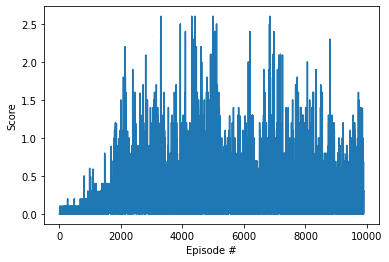

In [66]:
def train_d4pgAgent(env, brain_name, agent, n_episodes=100, max_t=1000):
    """D4PG for continuous control.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decrement (float): subtractive factor (per episode) for decreasing epsilon
    """
    max_scores_window = deque(maxlen=100)  # last 100 average scores over all agents
    epsilon = 1.0
    epsilon_dec = 0
    envSolved = False
    envSolvedInEpisodes = 0

    max_scores = []
    for i_episode in range(1, n_episodes+1):
        agent.reset_noise()       
        scores = np.zeros(num_agents)                          # initialize the score (for each agent)
        env_info = env.reset(train_mode=True)[brain_name]      # reset the environment
        
        states = env_info.vector_observations                  # get the current state (for each agent)
        t = -1
        while True:
            t += 1
        #for t in range(max_t):
            if i_episode < 512:
                actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
                actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
            else:
                actions = agent.act(states, epsilon)    # num_agents x action_size

            env_info = env.step(actions)[brain_name]       # send the action to the environment
            next_states = env_info.vector_observations     # get the next states
            rewards = env_info.rewards                     # get the rewards
            dones = env_info.local_done                    # see if episodes have finished
            
            agent.step(states, actions, rewards, next_states, dones, t)
            
            states = next_states
            scores += rewards
            if np.any(dones):
                maxScore = np.max(scores)                  # save max score at end of episode
                #scores = np.zeros(num_agents)              # uncomment if you are continuing training
                break                                     # uncomment if you reset training at end of each episode
        
        epsilon -= epsilon_dec
        
        max_scores.append(maxScore)
        max_scores_window.append(maxScore)       # save most recent max score over both agents
        
        avgMaxScoreOver100Episodes = np.mean(max_scores_window)
        
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, avgMaxScoreOver100Episodes), end="")
        
        if i_episode % 100 == 0:
            for i in range(agent.num_agents):
                torch.save(agent.actorNetworks_local[i].state_dict(), 'actorNetwork_' + str(i) + '.pth')
                torch.save(agent.criticNetworks_local[i].state_dict(), 'criticNetwork_' + str(i) + '.pth')
        
        if not envSolved and avgMaxScoreOver100Episodes >= 0.5:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, avgMaxScoreOver100Episodes))
            envSolved = True
            envSolvedInEpisodes = i_episode
            #break
        
        if envSolved and i_episode > envSolvedInEpisodes + 3000:   # hard stop 3000 episodes after solving environment
            break
        
    return max_scores

#from session_utils import active_session 
import matplotlib.pyplot as plt
%matplotlib inline

agent = Agent(num_agents=num_agents, state_size=state_size, action_size=action_size, seed=2)

#with active_session():
scores = train_d4pgAgent(env, brain_name, agent, 10000, 1000)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [67]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment

# lets see how well our agent performs
agent = Agent(num_agents=num_agents, state_size=state_size, action_size=action_size, seed=0)

map_location='cpu'

# load the weights from file
for i in range(num_agents):
    agent.actorNetworks_local[i].load_state_dict(torch.load('actorNetwork_' + str(i) + '.pth', map_location=map_location))
    agent.criticNetworks_local[i].load_state_dict(torch.load('criticNetwork_' + str(i) + '.pth', map_location=map_location))

scores = np.zeros(num_agents)                          # initialize the score (for each agent)
for i in range(1000):
    actions = agent.act(states)                        # num_agents x action_size

    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    
    states = next_states                               # roll over states to next time step
    
    scores += rewards
    if np.any(dones):
        break
    
maxScore = np.max(scores)

print('\rStep: {}\Max Reward: {:.2f}'.format(i, maxScore), end="")

Step: 148\Max Reward: 0.29

When finished, you can close the environment.

In [ ]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```